In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data
# Train
df_train = pd.read_csv("./data/train.csv")
# Test
# Note that test set has no SalePrice, which is what you are going to predict
# Therefore, you need to get your own "test" set from the train data to evaluate your model
# The test set is evaluated onto kaggle
df_test = pd.read_csv("./data/test.csv")

In [4]:
print(df_train.info())
print(set(df_train.dtypes.values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Print columns with missing values
print("Columns with nulls:\n",df_train.isna().sum().loc[df_train.isna().sum() > 0])

Columns with nulls:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
# Check if fireplace quality matches fireplaces
df_train.loc[df_train["FireplaceQu"].isna()]["Fireplaces"].describe()

count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

In [47]:
# Check BsmtFinSF1 and BsmtFinSF2 values when there are no basements
print(df_train.loc[df_train["BsmtFinType1"].isna()]["BsmtFinSF1"].describe())

# Note that FinType2 has some issues
print(df_train.loc[df_train["BsmtFinType2"].isna()]["BsmtFinSF2"].describe())
print(df_train.groupby("BsmtFinType1")["BsmtFinSF1"].describe())
print(df_train.groupby("BsmtFinType2")["BsmtFinSF2"].describe())

# check BsmtExposure
print(df_train.loc[df_train["BsmtFinType1"] == "Unf"][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]["BsmtExposure"].value_counts())

# check MasVnrType
print(df_train.loc[df_train["MasVnrType"].isna() | df_train["MasVnrArea"].isna()])
print(df_train.groupby("MasVnrType")["MasVnrArea"].describe())
df_train.groupby(["MasVnrType", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond"])["MasVnrArea"].describe()

# Check electrical
print(df_train["Electrical"].value_counts())

count    37.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: BsmtFinSF1, dtype: float64
count    37.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: BsmtFinSF2, dtype: float64
              count        mean         std    min     25%    50%      75%  \
BsmtFinType1                                                                 
ALQ           220.0  619.863636  320.433310   20.0  383.25  593.5   788.25   
BLQ           148.0  536.668919  270.945193   25.0  349.50  516.5   675.00   
GLQ           418.0  801.729665  490.888087    2.0  517.00  739.5  1081.25   
LwQ            74.0  379.540541  269.696236   16.0  187.00  318.0   503.00   
Rec           133.0  516.601504  272.460866  129.0  312.00  456.0   637.00   
Unf           430.0    0.000000    0.000000    0.0    0.00    0.0     0.00   

                 max  
BsmtFinType1          
ALQ           1880.0  
BLQ           12

In [69]:
df_train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [52]:
#Fill in missing values
df_train.loc[df_train["Id"] == 949, "BsmtExposure"] = "No"
df_train.loc[(df_train["MasVnrType"].isna())
            & (df_train["MasVnrArea"].isna()), "MasVnrArea"] = 0
df_train.loc[(df_train["BsmtFinType2"].isna())
            & (df_train["BsmtFinSF2"] > 0), "BsmtFinType2"] = "Rec"
df_train.loc[df_train["MasVnrArea"] == 1, "MasVnrArea"] = 0
df_train.loc[df_train["MasVnrArea"] == 288, "MasVnrType"] = "BrkCmn"
df_train.loc[df_train["MasVnrArea"] == 344, "MasVnrType"] = "BrkFace"
df_train.loc[df_train["MasVnrArea"] == 288, "MasVnrType"] = "BrkFace"
df_train.loc[df_train["Electrical"].isna(), "Electrical"] = df_train["Electrical"].value_counts().nlargest(1).index[0]

NameError: name 'np' is not defined

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


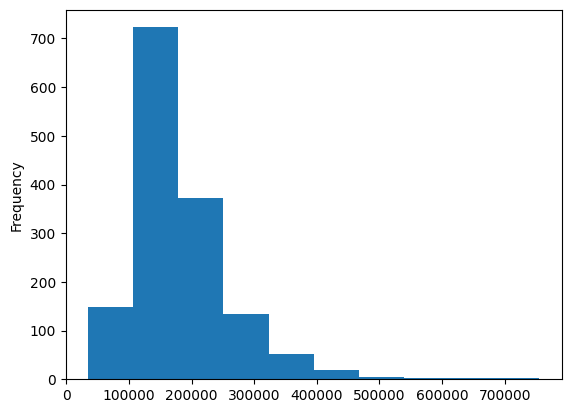

In [10]:
# Histogram plot of sale prices
# Note that there are some outliers
df_train["SalePrice"].plot.hist()
print(df_train["SalePrice"].describe())

In [12]:
# Check 
check_cols = list(df_train.isna().sum()[df_train.isna().sum() != 0].index)
df_train[check_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

<Axes: >

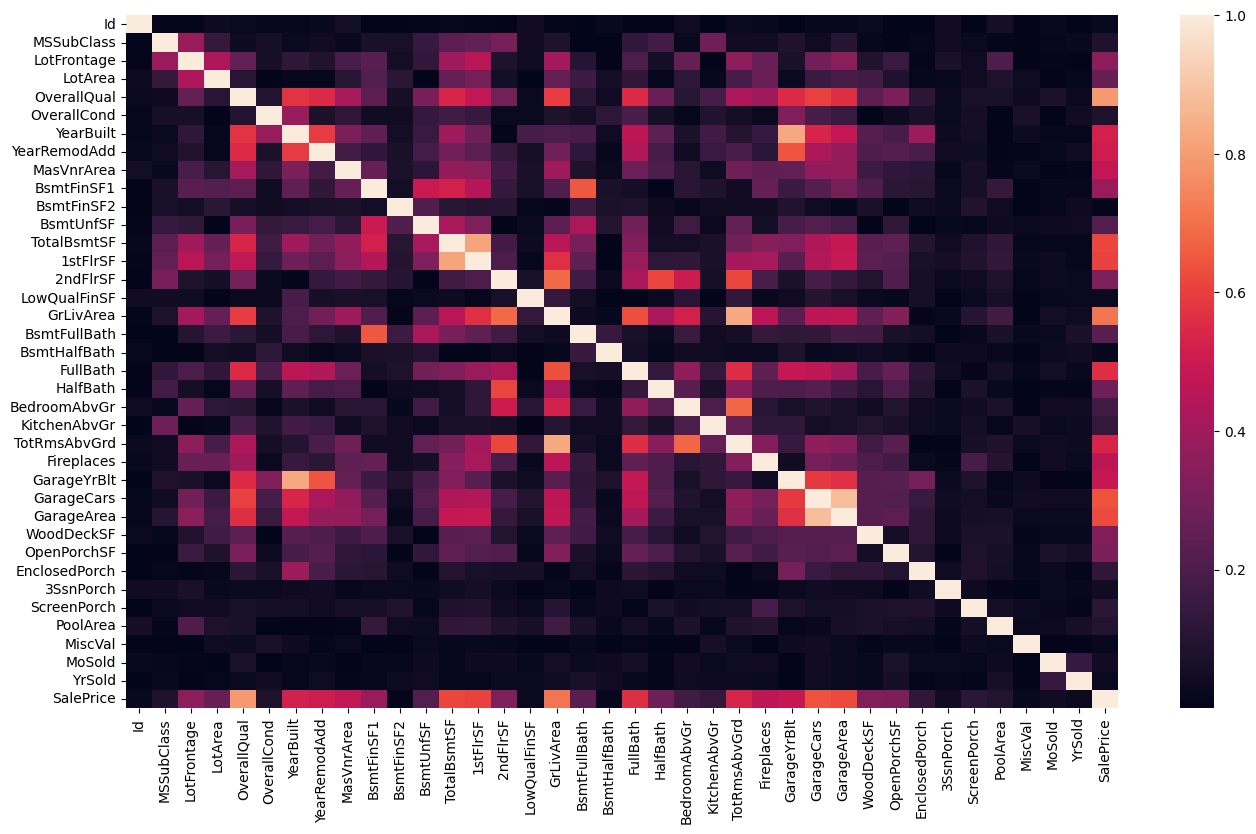

In [34]:
# Correlation matrix
df_train_numeric = df_train.select_dtypes(exclude="object")
df_train_numeric.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(df_train_numeric.corr().abs())

<Axes: xlabel='LotFrontage', ylabel='Percent'>

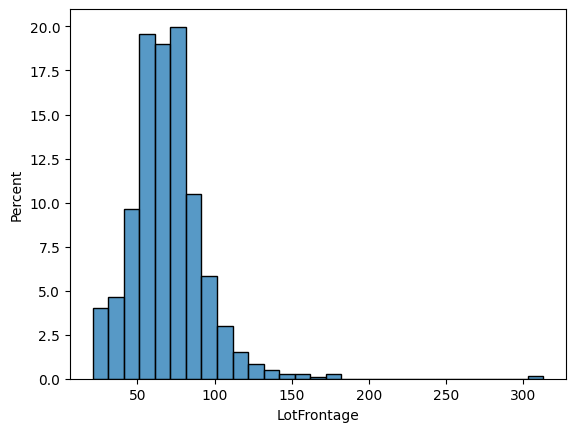

In [15]:
# Lot Frontage
sns.histplot(df_train["LotFrontage"], stat="percent", binwidth=10)